#Assignment2

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/train.csv")

In [2]:
print("\nMissing values per column:")
print(df.isnull().sum())

for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):

            df[col].fillna(df[col].mean(), inplace=True)
        elif pd.api.types.is_categorical_dtype(df[col]):

            df[col].fillna(df[col].mode()[0], inplace=True)
        else:

            df.dropna(subset=[col], inplace=True)
print("\nMissing values after handling:")
print(df.isnull().sum())

print("\nData after handling missing values:")
print(df.head())


Missing values per column:
Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64

Missing values after handling:
Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

Data after handling missing values:
    Unnamed: 0                               Name Location  Year  \
1            2                       Honda Jazz V  Chennai  2011   
5            7  Toyota Innova Crysta 2.8 GX AT 8S   Mum

/tmp/ipython-input-2758205988.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipython-input-2758205988.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]):
/tmp/ipython-input-2758205988.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the ori

In [3]:
def remove_units(value):
    if isinstance(value, str):
        value = value.replace('kmpl', '').replace('CC', '').replace('bhp', '').replace('lakh', '')
        return value.strip()
    return value

columns_to_clean = ['Mileage', 'Engine', 'Power', 'New_price']
for col in columns_to_clean:
    if col in df.columns:  # Check if the column exists in the DataFrame
        df[col] = df[col].apply(remove_units)

print("\nData after removing units:")
print(df.head())


Data after removing units:
    Unnamed: 0                               Name Location  Year  \
1            2                       Honda Jazz V  Chennai  2011   
5            7  Toyota Innova Crysta 2.8 GX AT 8S   Mumbai  2016   
8           10                   Maruti Ciaz Zeta    Kochi  2018   
13          15        Mitsubishi Pajero Sport 4X4    Delhi  2014   
18          20                  BMW 3 Series 320d    Kochi  2014   

    Kilometers_Driven Fuel_Type Transmission Owner_Type   Mileage Engine  \
1               46000    Petrol       Manual      First  13 km/kg   1199   
5               36000    Diesel    Automatic      First     11.36   2755   
8               25692    Petrol       Manual      First     21.56   1462   
13             110000    Diesel       Manual      First      13.5   2477   
18              32982    Diesel    Automatic      First     22.69   1995   

     Power  Seats   New_Price  Price  
1     88.7    5.0   8.61 Lakh   4.50  
5    171.5    8.0     21 Lak

In [4]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission'], drop_first=True)

print("\nData after one-hot encoding:")
print(df.head())


Data after one-hot encoding:
    Unnamed: 0                               Name Location  Year  \
1            2                       Honda Jazz V  Chennai  2011   
5            7  Toyota Innova Crysta 2.8 GX AT 8S   Mumbai  2016   
8           10                   Maruti Ciaz Zeta    Kochi  2018   
13          15        Mitsubishi Pajero Sport 4X4    Delhi  2014   
18          20                  BMW 3 Series 320d    Kochi  2014   

    Kilometers_Driven Owner_Type   Mileage Engine   Power  Seats   New_Price  \
1               46000      First  13 km/kg   1199    88.7    5.0   8.61 Lakh   
5               36000      First     11.36   2755   171.5    8.0     21 Lakh   
8               25692      First     21.56   1462  103.25    5.0  10.65 Lakh   
13             110000      First      13.5   2477  175.56    7.0  32.01 Lakh   
18              32982      First     22.69   1995     190    5.0  47.87 Lakh   

    Price  Fuel_Type_Petrol  Transmission_Manual  
1    4.50              True  

In [5]:
current_year = 2025
df['Car_Age'] = current_year - df['Year']

print("\nData after adding Car_Age feature:")
print(df.head())


Data after adding Car_Age feature:
    Unnamed: 0                               Name Location  Year  \
1            2                       Honda Jazz V  Chennai  2011   
5            7  Toyota Innova Crysta 2.8 GX AT 8S   Mumbai  2016   
8           10                   Maruti Ciaz Zeta    Kochi  2018   
13          15        Mitsubishi Pajero Sport 4X4    Delhi  2014   
18          20                  BMW 3 Series 320d    Kochi  2014   

    Kilometers_Driven Owner_Type   Mileage Engine   Power  Seats   New_Price  \
1               46000      First  13 km/kg   1199    88.7    5.0   8.61 Lakh   
5               36000      First     11.36   2755   171.5    8.0     21 Lakh   
8               25692      First     21.56   1462  103.25    5.0  10.65 Lakh   
13             110000      First      13.5   2477  175.56    7.0  32.01 Lakh   
18              32982      First     22.69   1995     190    5.0  47.87 Lakh   

    Price  Fuel_Type_Petrol  Transmission_Manual  Car_Age  
1    4.50     

In [6]:
selected_columns = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type_Diesel', 'Transmission_Manual', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_Age']  # Added Car_Age and removed Fuel_Type, Transmission
df_selected = df[[col for col in selected_columns if col in df.columns]]

df_filtered = df_selected[df_selected['Seats'] > 5]

df_renamed = df_filtered.rename(columns={'Kilometers_Driven': 'Kilometers'})

df_mutated = df_renamed.copy()
df_mutated['Kilometers_Plus_1000'] = df_mutated['Kilometers'] + 1000

df_arranged = df_mutated.sort_values(by='Price', ascending=False)

df_summarized = df_arranged.groupby('Location').agg({'Price': 'mean', 'Kilometers': 'sum'})

print("\nSelected columns:")
print(df_selected.head())

print("\nFiltered data:")
print(df_filtered.head())

print("\nRenamed column:")
print(df_renamed.head())

print("\nMutated data:")
print(df_mutated.head())

print("\nArranged data:")
print(df_arranged.head())

print("\nSummarized data:")
df_summarized


Selected columns:
                                 Name Location  Year  Kilometers_Driven  \
1                        Honda Jazz V  Chennai  2011              46000   
5   Toyota Innova Crysta 2.8 GX AT 8S   Mumbai  2016              36000   
8                    Maruti Ciaz Zeta    Kochi  2018              25692   
13        Mitsubishi Pajero Sport 4X4    Delhi  2014             110000   
18                  BMW 3 Series 320d    Kochi  2014              32982   

    Transmission_Manual Owner_Type   Mileage Engine   Power  Seats  Price  \
1                  True      First  13 km/kg   1199    88.7    5.0   4.50   
5                 False      First     11.36   2755   171.5    8.0  17.50   
8                  True      First     21.56   1462  103.25    5.0   9.95   
13                 True      First      13.5   2477  175.56    7.0  15.00   
18                False      First     22.69   1995     190    5.0  18.55   

    Car_Age  
1        14  
5         9  
8         7  
13       11

,Price,Kilometers
Location,,
Ahmedabad,18.664286,428547
Bangalore,16.315714,613733
Chennai,10.965000,787489
Coimbatore,18.933333,1310944
Delhi,20.316667,640000
Hyderabad,14.790833,819164
Jaipur,10.090000,448329
Kochi,21.115000,558020
Kolkata,16.220000,97618


#Assignment 3

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/diabetes.csv')





#Part a

Sample mean Glucose: 116.64, Population mean Glucose: 120.89
Sample max Glucose: 183, Population max Glucose: 199


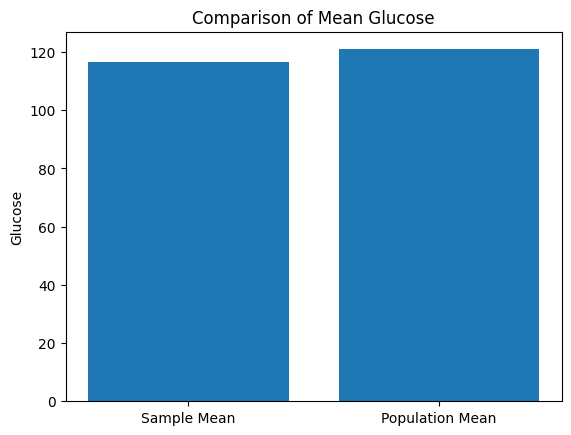

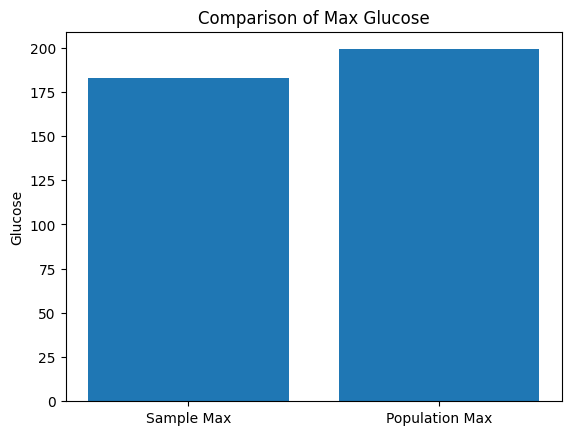

In [11]:
np.random.seed(42)
sample_a = df.sample(n=25, replace=False)
sample_mean_glucose = sample_a['Glucose'].mean()
sample_max_glucose = sample_a['Glucose'].max()
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()

print(f"Sample mean Glucose: {sample_mean_glucose:.2f}, Population mean Glucose: {pop_mean_glucose:.2f}")
print(f"Sample max Glucose: {sample_max_glucose}, Population max Glucose: {pop_max_glucose}")

plt.figure()
plt.bar(['Sample Mean', 'Population Mean'], [sample_mean_glucose, pop_mean_glucose])
plt.ylabel('Glucose')
plt.title('Comparison of Mean Glucose')
plt.show()

plt.figure()
plt.bar(['Sample Max', 'Population Max'], [sample_max_glucose, pop_max_glucose])
plt.ylabel('Glucose')
plt.title('Comparison of Max Glucose')
plt.show()

#Part b

Sample 98th percentile BMI: 40.25, Population 98th percentile BMI: 47.53


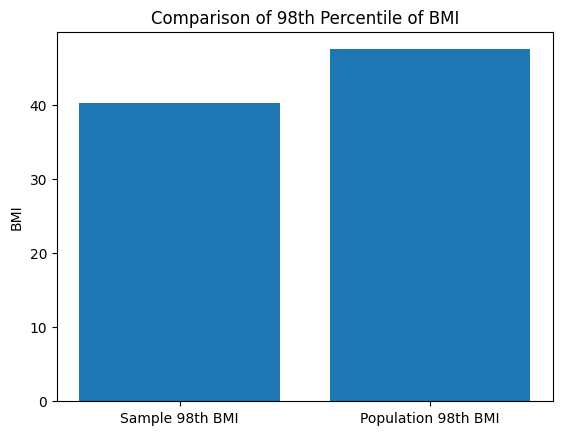

In [8]:
sample_98_BMI = np.percentile(sample_a['BMI'], 98)
pop_98_BMI = np.percentile(df['BMI'], 98)

print(f"Sample 98th percentile BMI: {sample_98_BMI:.2f}, Population 98th percentile BMI: {pop_98_BMI:.2f}")

plt.figure()
plt.bar(['Sample 98th BMI', 'Population 98th BMI'], [sample_98_BMI, pop_98_BMI])
plt.ylabel('BMI')
plt.title('Comparison of 98th Percentile of BMI')
plt.show()

#Part c

Bootstrap avg mean BP: 69.18, Population mean BP: 69.11
Bootstrap avg std BP: 19.08, Population std BP: 19.36
Bootstrap avg 98th percentile BP: 97.92, Population 98th percentile BP: 99.32


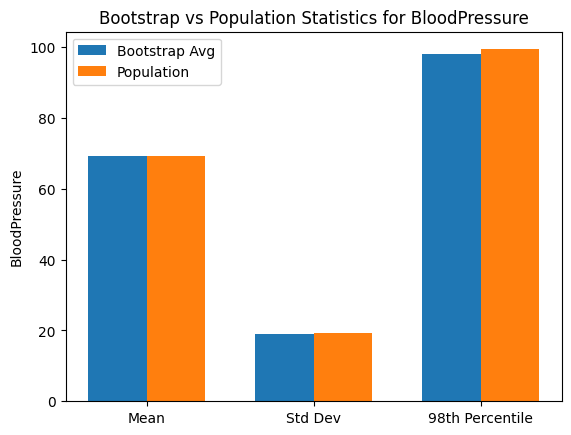

In [9]:
means = []
stds = []
percentiles = []
for _ in range(500):
    bs = df['BloodPressure'].sample(n=150, replace=True)
    means.append(bs.mean())
    stds.append(bs.std(ddof=1))
    percentiles.append(np.percentile(bs, 98))

mean_boot_mean = np.mean(means)
mean_boot_std = np.mean(stds)
mean_boot_percentile = np.mean(percentiles)

pop_mean_BP = df['BloodPressure'].mean()
pop_std_BP = df['BloodPressure'].std(ddof=1)
pop_98_BP = np.percentile(df['BloodPressure'], 98)

print(f"Bootstrap avg mean BP: {mean_boot_mean:.2f}, Population mean BP: {pop_mean_BP:.2f}")
print(f"Bootstrap avg std BP: {mean_boot_std:.2f}, Population std BP: {pop_std_BP:.2f}")
print(f"Bootstrap avg 98th percentile BP: {mean_boot_percentile:.2f}, Population 98th percentile BP: {pop_98_BP:.2f}")

stats = ['Mean', 'Std Dev', '98th Percentile']
bootstrap_stats = [mean_boot_mean, mean_boot_std, mean_boot_percentile]
pop_stats = [pop_mean_BP, pop_std_BP, pop_98_BP]

x = np.arange(len(stats))
width = 0.35
plt.figure()
plt.bar(x - width/2, bootstrap_stats, width, label='Bootstrap Avg')
plt.bar(x + width/2, pop_stats, width, label='Population')
plt.xticks(x, stats)
plt.ylabel('BloodPressure')
plt.title('Bootstrap vs Population Statistics for BloodPressure')
plt.legend()
plt.show()
